# Data Cleaning and Pre-processing

### Airbnb Listings from the city of Florence


**Open-source data** from: <br>
http://insideairbnb.com/get-the-data.html (data compiled: 12 July, 2021)

The raw dataset contains **11,364 listings** and **5,593** hosts.

## Table of Contents

* [Data Cleaning and Characterization](#chapter1)
    * [Data Dictionary](#section1.1)
    * [Handling Missing Values](#section1.2)
    * [Convert Columns to Appropriate Datatype](#section1.3)
    * [Select the Most Important Amenities](#section1.4)
* [EDA and Data Viz](#chapter2)
* [Data Pre-processing](#chapter3)

### IMPORT LIBRARIES

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import datetime
import re

from itertools import chain

%matplotlib inline

[Back to TOC](#Table-of-Contents) 
<a id='chapter1'></a>

### DATA CLEANING AND CHARACTERIZATION

 - What data types are in each column?
 - How can we describe the data?
 - Convert columns to their correct datatype
 - Drop columns not relevant to the problem (Example, URL, host picture, etc.)
 - Impute null values, either with a meaningful value or a "NA" string to convert later

In [15]:
# Load data
df = pd.read_csv('data/listings.csv')

In [16]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [17]:
df[df.id == 28827610]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6688,28827610,https://www.airbnb.com/rooms/28827610,20210712150741,2021-07-13,Cozy room in Florence,Snuggle up in a comfy bed and settle in for a ...,NaN,https://a0.muscache.com/pictures/9fdd900e-7c84...,217201511,https://www.airbnb.com/users/show/217201511,...,4.69,4.44,4.69,NaN,f,1,0,0,1,0.52


In [18]:
print(f'Number of instances: {df.shape[0]}')
print(f'Number of attributes: {df.shape[1]}')

Number of instances: 11364
Number of attributes: 74


[Back to TOC](#Table-of-Contents) 
<a class="anchor" id='section1.1'></a>

### Data Dictionary

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11364 entries, 0 to 11363
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11364 non-null  int64  
 1   listing_url                                   11364 non-null  object 
 2   scrape_id                                     11364 non-null  int64  
 3   last_scraped                                  11364 non-null  object 
 4   name                                          11362 non-null  object 
 5   description                                   11167 non-null  object 
 6   neighborhood_overview                         7273 non-null   object 
 7   picture_url                                   11364 non-null  object 
 8   host_id                                       11364 non-null  int64  
 9   host_url                                      11364 non-null 

In [20]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.136400e+04,1.136400e+04,1.136400e+04,11114.000000,11114.000000,0.0,11364.000000,11364.000000,11364.000000,0.0,...,8560.000000,8557.00000,8557.000000,8557.000000,8555.000000,11364.000000,11364.000000,11364.000000,11364.000000,8641.000000
mean,2.451295e+07,2.021071e+13,9.336482e+07,28.126417,28.126417,NaN,43.773970,11.253741,3.746744,NaN,...,4.761133,4.84293,4.836304,4.809875,4.697973,16.666315,11.218585,5.329285,0.009944,1.240854
std,1.548873e+07,0.000000e+00,1.067000e+08,121.756857,121.756857,NaN,0.009675,0.016270,2.053520,NaN,...,0.378772,0.30137,0.324095,0.298208,0.366419,43.609462,32.118969,30.227874,0.159168,1.391153
min,2.446900e+04,2.021071e+13,1.565100e+04,0.000000,0.000000,NaN,43.726430,11.159190,0.000000,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.140529e+07,2.021071e+13,1.090685e+07,1.000000,1.000000,NaN,43.768610,11.245602,2.000000,NaN,...,4.700000,4.81000,4.810000,4.730000,4.610000,1.000000,1.000000,0.000000,0.000000,0.210000
50%,2.349237e+07,2.021071e+13,4.289194e+07,3.000000,3.000000,NaN,43.772550,11.253984,4.000000,NaN,...,4.880000,4.93000,4.940000,4.920000,4.790000,3.000000,1.000000,0.000000,0.000000,0.760000
75%,3.775198e+07,2.021071e+13,1.572704e+08,8.000000,8.000000,NaN,43.777997,11.261450,4.000000,NaN,...,4.990000,5.00000,5.000000,5.000000,4.900000,8.000000,6.000000,1.000000,0.000000,1.870000
max,5.098406e+07,2.021071e+13,4.117103e+08,1507.000000,1507.000000,NaN,43.830530,11.331620,16.000000,NaN,...,5.000000,5.00000,5.000000,5.000000,5.000000,225.000000,204.000000,217.000000,4.000000,30.710000


In [24]:
print(f'The dataset contains {df.host_id.nunique()} unique host ID')

The dataset contains 5593 unique host ID


In [26]:
# Mean, standard deviation, min, max of listings per host

df.groupby('host_id').id.count().agg([np.mean,np.std,np.min,np.max])

mean      2.031825
std       5.453443
amin      1.000000
amax    225.000000
Name: id, dtype: float64

In [13]:
# Check how data types are distributed. We have to check if each data type makes sense

df.dtypes.value_counts()

object     34
int64      21
float64    19
dtype: int64

In [14]:
df.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable'],
      dtype='object')

In [15]:
df.select_dtypes(include=['object']).head()

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/24469,2021-07-13,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",In 10/15 minutes walking or with only one stop...,https://a0.muscache.com/pictures/fd822ef3-4f6d...,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy",...,Entire home/apt,1 bath,"[""Coffee maker"", ""Refrigerator"", ""Dedicated wo...",$70.00,t,2021-07-13,2019-09-27,2019-09-27,NaN,t
1,https://www.airbnb.com/rooms/24470,2021-07-13,Fortezza/City Centre Modern Apt 2+1,"Apartment, perfect for 2 people, can accommoda...",In 10/15 minutes walking you will reach the hi...,https://a0.muscache.com/pictures/cfa220db-5c70...,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy",...,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Paid parking on p...",$70.00,t,2021-07-13,2019-04-21,2010-10-22,NaN,t
2,https://www.airbnb.com/rooms/24471,2021-07-13,Fortezza/City Centre Modern Apt 4+2,"Perfect, big apartment for families or groups ...",In 10/15 minutes walking you will reach the hi...,https://a0.muscache.com/pictures/31756e2d-098a...,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy",...,Entire home/apt,1.5 baths,"[""Coffee maker"", ""Refrigerator"", ""Dedicated wo...",$135.00,t,2021-07-13,NaN,NaN,NaN,t
3,https://www.airbnb.com/rooms/24472,2021-07-13,Fortezza/City Centre Modern Apt 4+2,"Santa Maria Novella, perfect apartment for fam...",In 10/15 minutes walking or with only one stop...,https://a0.muscache.com/pictures/130826/15c567...,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy",...,Entire home/apt,1 bath,"[""Paid parking on premises"", ""Fire extinguishe...",$120.00,t,2021-07-13,2011-06-28,2012-04-11,NaN,t
4,https://www.airbnb.com/rooms/31840,2021-07-12,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",NaN,https://a0.muscache.com/pictures/09da8cb8-47df...,https://www.airbnb.com/users/show/380378,Officina 360,2011-02-07,"Florence, Tuscany, Italy",...,Private room,1 private bath,"[""Keypad"", ""Coffee maker"", ""Refrigerator"", ""Ca...",$65.00,t,2021-07-12,2013-04-21,2019-12-20,NaN,t


In [16]:
# Drop irrelevant object types that are not useful for the analysis, without losing much of information.

drop_obj_cols = [
                 'listing_url','last_scraped',
                 'name', 'description',
                 'picture_url','host_url',
                 'neighborhood_overview',
                 'host_name','host_since',
                 'host_location','host_about',
                 'host_thumbnail_url','host_picture_url',
                 'host_neighbourhood','calendar_last_scraped',
                 'neighbourhood', 'has_availability',
                 'calendar_last_scraped', 'license',
                 'host_verifications','property_type'
                ]

In [17]:
df.select_dtypes(include=['float64']).columns

Index(['host_listings_count', 'host_total_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calendar_updated', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [18]:
df.select_dtypes(include=['float64']).head()

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5.0,5.0,NaN,43.78210,11.24392,NaN,1.0,1.0,2.0,365.0,NaN,5.00,5.00,5.00,5.00,5.00,4.0,5.00,0.05
1,5.0,5.0,NaN,43.78202,11.24399,NaN,1.0,1.0,2.0,365.0,NaN,4.67,5.00,5.00,5.00,5.00,4.0,5.00,0.11
2,5.0,5.0,NaN,43.78202,11.24399,NaN,2.0,2.0,2.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,43.78202,11.24399,NaN,2.0,2.0,2.0,365.0,NaN,3.00,5.00,5.00,5.00,5.00,4.0,4.50,0.02
4,32.0,32.0,NaN,43.77709,11.25216,NaN,1.0,1.0,1.3,99.0,NaN,4.65,4.73,4.87,4.85,4.91,4.9,4.71,1.19


In [19]:
drop_float_cols = [
                   'neighbourhood_group_cleansed',
                   'bathrooms','calendar_updated',
                   'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm'
                   ]

In [20]:
df.select_dtypes(include=['int64']).columns

Index(['id', 'scrape_id', 'host_id', 'accommodates', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [21]:
df.select_dtypes(include=['int64']).head()

,id,scrape_id,host_id,accommodates,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,24469,20210712150741,99178,4,2,365,2,2,365,365,...,60,90,365,1,0,0,4,4,0,0
1,24470,20210712150741,99178,3,2,365,2,2,365,365,...,60,90,365,3,0,0,4,4,0,0
2,24471,20210712150741,99178,6,2,365,2,2,365,365,...,60,90,365,0,0,0,4,4,0,0
3,24472,20210712150741,99178,6,2,365,2,2,365,365,...,60,90,365,2,0,0,4,4,0,0
4,31840,20210712150741,380378,2,1,99,1,2,99,99,...,38,60,301,119,1,0,26,22,4,0


In [22]:
drop_int_cols = [
                 'scrape_id','host_id',
                 'minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights',
                 'availability_30', 'availability_60', 
                 'availability_365','availability_90',
                 'calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes',
                 'calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms'
                ]

In [23]:
drop_cols = drop_obj_cols + drop_float_cols + drop_int_cols

print(f"Shape of the dataset before dropping: {df.shape}")
print(f"Dropping {len(drop_cols)} columns")
df_cols_clean = df.drop(columns=drop_cols)
print(f"Shape of the dataset after dropping: {df_cols_clean.shape}")

Shape of the dataset before dropping: (11364, 74)
Dropping 40 columns
Shape of the dataset after dropping: (11364, 35)


[Back to TOC](#Table-of-Contents)  
<a class="anchor" id='section1.2'></a>

### Handling Missing Values

In [24]:
# Check for missing values
cols_missings_perc = df_cols_clean.isnull().sum() / len(df_cols_clean)
cols_missings = cols_missings_perc[cols_missings_perc >0]

<AxesSubplot:>

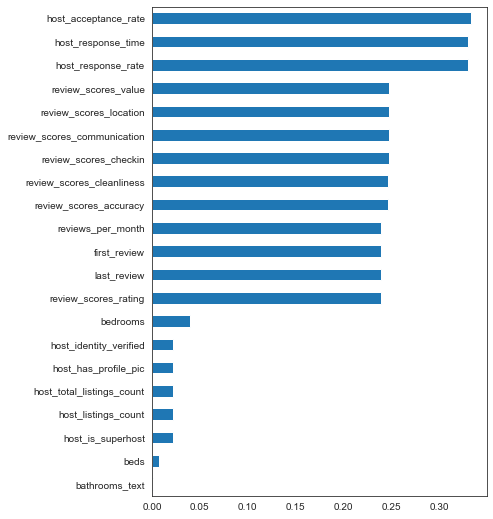

In [25]:
cols_missings.sort_values(ascending=True).plot(kind='barh', figsize=(6,9))

In [26]:
df_cols_clean['host_acceptance_rate'] = df_cols_clean['host_acceptance_rate'].str.rstrip("%")

/Users/loredanafattorini/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


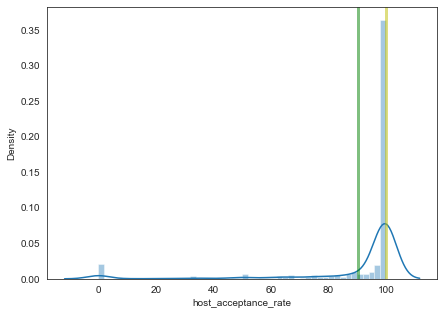

In [32]:
f, ax = plt.subplots(figsize=(7, 5))

df_cols_clean['host_acceptance_rate'] = pd.to_numeric(df_cols_clean.host_acceptance_rate)
ax = sns.distplot(df_cols_clean['host_acceptance_rate'])

plt.axvline(x=df_cols_clean.host_acceptance_rate.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df_cols_clean.host_acceptance_rate.median(), linewidth=3, color='y', label="median", alpha=0.5)


/Users/loredanafattorini/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


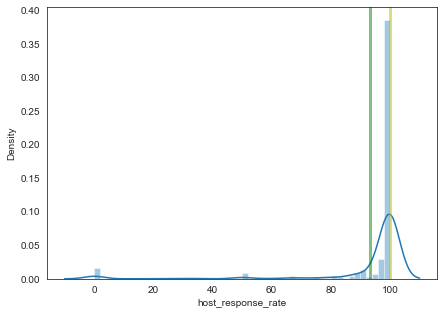

In [33]:
df_cols_clean['host_response_rate'] = df_cols_clean['host_response_rate'].str.rstrip("%")

f, ax = plt.subplots(figsize=(7, 5))

df_cols_clean['host_response_rate'] = pd.to_numeric(df_cols_clean.host_response_rate)
ax = sns.distplot(df_cols_clean.host_response_rate)

plt.axvline(x=df_cols_clean.host_response_rate.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df_cols_clean.host_response_rate.median(), linewidth=3, color='y', label="median", alpha=0.5)


In [34]:
df_cols_clean.drop(df_cols_clean[df_cols_clean.accommodates == 0].index, inplace = True)
df_cols_clean.drop(df_cols_clean[df_cols_clean.beds == 0].index, inplace = True)
df_cols_clean.drop(df_cols_clean[df_cols_clean.beds.isnull() == True].index, inplace = True)
df_cols_clean.drop(df_cols_clean[df_cols_clean.bathrooms_text.isnull() == True].index, inplace = True)

In [35]:
# Fill the missing values for host_acceptance_rate with the median since the distribution is left skewed
df_cols_clean['host_acceptance_rate'].fillna(df_cols_clean['host_acceptance_rate'].median(), inplace = True)

# Fill the missing values for host_acceptance_rate with the median since the distribution is left skewed
df_cols_clean['host_response_rate'].fillna(df_cols_clean['host_response_rate'].median(), inplace = True)

# Fill the missing values for host_response_time (categorical) with NA
df_cols_clean['host_response_time'].fillna('NA', inplace = True)

In [36]:
# Fill the missing values for review_score_* with the mean by accommodates (# of people that can be hosted)

df_cols_clean['review_scores_rating'].fillna(df_cols_clean.groupby('accommodates')['review_scores_rating'].transform('mean'), inplace = True)
df_cols_clean['review_scores_accuracy'].fillna(df_cols_clean.groupby('accommodates')['review_scores_accuracy'].transform('mean'), inplace = True)
df_cols_clean['review_scores_cleanliness'].fillna(df_cols_clean.groupby('accommodates')['review_scores_cleanliness'].transform('mean'), inplace = True)
df_cols_clean['review_scores_checkin'].fillna(df_cols_clean.groupby('accommodates')['review_scores_checkin'].transform('mean'), inplace = True)
df_cols_clean['review_scores_communication'].fillna(df_cols_clean.groupby('accommodates')['review_scores_communication'].transform('mean'), inplace = True)
df_cols_clean['review_scores_location'].fillna(df_cols_clean.groupby('accommodates')['review_scores_location'].transform('mean'), inplace = True)
df_cols_clean['review_scores_value'].fillna(df_cols_clean.groupby('accommodates')['review_scores_value'].transform('mean'), inplace = True)


In [37]:
# Fill missing values for reviews_per_month, first_review, last_review with 0, since it seems these records don't have any review.

df_cols_clean['reviews_per_month'].fillna(0, inplace = True)

In [38]:
df_cols_clean['first_review'] = pd.to_datetime(df_cols_clean['first_review'], infer_datetime_format=True)


In [39]:
df_cols_clean['last_review'] = pd.to_datetime(df_cols_clean['last_review'], infer_datetime_format=True)

In [40]:
# Fill missing values for host_identity_verified with NA
df_cols_clean.host_identity_verified.fillna('NA', inplace = True)

# Fill missing values for host_has_profile_pic with NA
df_cols_clean.host_has_profile_pic.fillna('NA', inplace = True)

# Fill missing values for host_total_listing_count with the median
df_cols_clean.host_total_listings_count.fillna(df_cols_clean.host_total_listings_count.median(), inplace = True)

# Fill missing values for host_listing_count with the median
df_cols_clean.host_listings_count.fillna(df_cols_clean.host_listings_count.median(), inplace = True)

# Fill missing values for host_is_superhost with the NA
df_cols_clean.host_is_superhost.fillna('NA', inplace = True)

In [41]:
# Fill the missing values for bedrooms with 1, since most of them are studio, suite or loft
df_cols_clean['bedrooms'].fillna(1, inplace = True)

In [42]:
df_cols_clean['bathrooms'] = df_cols_clean.bathrooms_text.str.extract(r'([+-]?([0-9]*[.])?[0-9]+)', expand = False).astype(float)[0]
df_cols_clean['bathrooms'].fillna(1, inplace = True)

[Back to TOC](#Table-of-Contents)  
<a class="anchor" id='section1.3'></a>

### Convert Columns to Appropriate Datatype

In [43]:
# Create a new column with 1 if the bathroom is shared and 0 otherwise.
word_list = ['shared']
df_cols_clean['bathroom_shared'] = df.bathrooms_text.str.extract(r'({})'.format('|'.join(word_list)), expand=False).str.lower().fillna('')
df_cols_clean['bathroom_shared'] = [1 if x == 'shared' else 0 for x in df_cols_clean['bathroom_shared']]

df_cols_clean = df_cols_clean.drop(columns=['bathrooms_text'])

In [44]:
# Convert price column to numeric
df_cols_clean['price'] = [float(str(i).replace('$','').replace(',', '')) for i in df_cols_clean['price']]

In [45]:
# Convert first_review and last_review to datetime and create numeric columns
df_cols_clean[['first_review','last_review']] = df_cols_clean[['first_review','last_review']].apply(pd.to_datetime)
df_cols_clean['days_since_first_review'] = (datetime.datetime.utcnow() - df_cols_clean['first_review']).dt.days
df_cols_clean['days_since_last_review'] = (datetime.datetime.utcnow() - df_cols_clean['last_review']).dt.days

In [46]:
df_cols_clean = df_cols_clean.drop(columns=['first_review','last_review'])

[Back to TOC](#Table-of-Contents) 
<a class="anchor" id='section1.4'></a>

### Select the Most Important Amenities

In [47]:
# Lowecase amenities in lists
df_cols_clean['amenities'] = df_cols_clean['amenities'].str.lower()

In [48]:
# Replace the words pool table and whirpool to not confuse them with the pool when selecting the amenities
df_cols_clean['amenities'] = df_cols_clean['amenities'].str.replace('pool table','biliard')
df_cols_clean['amenities'] = df_cols_clean['amenities'].str.replace('whirpool','')

In [49]:
# Get an idea of what type of amenities are in the list to make a selection
amenities_list = []
for i in df_cols_clean['amenities']:
    items_lower = i.lower().replace('"', "")
    tokens = items_lower.split(',')
    amenities_list.append(tokens)

ameneties_list_unique = list(set(chain(*amenities_list)))
#ameneties_list_unique

In [50]:
# Select the most important amenities for guests based on the industry experience
amenities_searchfor = {
    'coffee_machine': ['coffee','espresso','nespresso'],
    'wifi': ['wifi'],
    'fireplace': ['fireplace','fire pit'],
    'microwave': ['microwave','microonde oven'],
    'parking': ['parking','garage'],
    'bathroom_essentials': ['shampoo','soap','shower gel','body soap'],
    'pool': ['pool'],
    'terrace_patio_balcony': ['terrace','patio','balcony'],
    'bathtub': ['bathtub'],
    'sauna': ['sauna'],
    'bikes': ['bikes'],
    'iron': ['iron','ironing board'],
    'garden_backyard': ['garden','backyard'],
    'workspace': ['desk','workspace'],
    'tv': ['tv'],
    'air_conditioning': ['air conditioning'],
    'pets_allowed': ['pets allowed'],
    'bbq_grill': ['bbq'],
    'crib': ['crib'],
    'gym': ['gym'],
    'bed_linens': ['bed linens'],
    'hair_dryer': ['hair dryer'],
    'luggage_dropoff_allowed': ['luggage dropoff allowed'],
    'self_checkin': ['self check-in'],
    'cooking_basics': ['cooking basics','dishes','silverware'],
    'refrigerator': ['refrigerator', 'mini fridge']
            }

for key, value in amenities_searchfor.items():
    df_cols_clean[key] = df_cols_clean['amenities'].str.contains("|".join(list(value)), case=False, na=False).astype(int)

df_cols_clean[amenities_searchfor.keys()].head()

,coffee_machine,wifi,fireplace,microwave,parking,bathroom_essentials,pool,terrace_patio_balcony,bathtub,sauna,...,pets_allowed,bbq_grill,crib,gym,bed_linens,hair_dryer,luggage_dropoff_allowed,self_checkin,cooking_basics,refrigerator
0,1,1,0,1,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1
1,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,1,1,0,1,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
3,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,1,1


In [51]:
# Drop column amenities
df_cols_clean = df_cols_clean.drop(columns=['amenities'])

### Check object data types

In [52]:
categorical_col = df_cols_clean.select_dtypes('object').columns.tolist()
for c in categorical_col:
    print(round(df_cols_clean[c].value_counts(normalize=True)*100,2))
    print("====================================")
    print(" ")

within an hour        48.65
NA                    33.13
within a few hours     8.62
within a day           6.81
a few days or more     2.78
Name: host_response_time, dtype: float64
 
f     67.81
t     29.92
NA     2.27
Name: host_is_superhost, dtype: float64
 
t     97.45
NA     2.27
f      0.27
Name: host_has_profile_pic, dtype: float64
 
t     79.80
f     17.93
NA     2.27
Name: host_identity_verified, dtype: float64
 
Centro Storico       73.58
Campo di Marte        9.93
Rifredi               8.05
Isolotto Legnaia      4.28
Gavinana Galluzzo     4.17
Name: neighbourhood_cleansed, dtype: float64
 
Entire home/apt    74.80
Private room       22.99
Hotel room          1.90
Shared room         0.31
Name: room_type, dtype: float64
 
t    60.09
f    39.91
Name: instant_bookable, dtype: float64
 


In [53]:
# Convert feature instant_bookable to 1 for true and 0 for false
# Dealing with binary variables

def encode_binary_variables(data,col):
    data[col] = data[col].replace({'t':1, 'f':0})
    return data

df_cols_clean = encode_binary_variables(df_cols_clean,'instant_bookable')

df_cols_clean['instant_bookable'].value_counts(normalize=True)

1    0.600873
0    0.399127
Name: instant_bookable, dtype: float64

### Check numerical data types

In [54]:
numerical_col = df_cols_clean.select_dtypes(['int64','float64']).columns.tolist()
for n in numerical_col:
    print(round(df_cols_clean[n].value_counts(normalize=True)*100,2))
    print("====================================")
    print(" ")

24469       0.01
33231880    0.01
33189798    0.01
33193079    0.01
33195573    0.01
            ... 
16064507    0.01
16066527    0.01
16067209    0.01
16069119    0.01
50984060    0.01
Name: id, Length: 10994, dtype: float64
 
100.0    82.92
96.0      2.27
0.0       2.14
97.0      1.67
90.0      1.44
99.0      1.40
50.0      1.05
88.0      0.70
95.0      0.60
67.0      0.57
80.0      0.56
86.0      0.54
98.0      0.48
94.0      0.45
89.0      0.42
75.0      0.31
91.0      0.29
93.0      0.26
83.0      0.22
92.0      0.19
33.0      0.17
60.0      0.16
25.0      0.15
29.0      0.12
70.0      0.11
87.0      0.10
79.0      0.07
71.0      0.07
77.0      0.06
68.0      0.06
30.0      0.05
20.0      0.05
76.0      0.05
59.0      0.04
82.0      0.04
78.0      0.04
57.0      0.03
73.0      0.03
23.0      0.03
43.0      0.02
40.0      0.02
38.0      0.02
13.0      0.01
11.0      0.01
63.0      0.01
17.0      0.01
69.0      0.01
Name: host_response_rate, dtype: float64
 
100.0    75.56
99.0    

[Back to TOC](#Table-of-Contents) 
<a id='chapter2'></a>

### EDA and Data Viz
    
    


In [55]:
# Remove outlier in Shared_room
delete_row = df_cols_clean[df_cols_clean.id == 28827610].index
df_cols_clean = df_cols_clean.drop(delete_row)

In [56]:
df.price[(df.room_type == 'Private room') & (df.accommodates==7)]

10680    $1,031.00
Name: price, dtype: object

In [57]:
df_cols_clean['price_per_person'] = df_cols_clean.price / df_cols_clean.accommodates

In [58]:
df_cols_clean[['price','price_per_person']].describe()

,price,price_per_person
count,10993.000000,10993.000000
mean,124.807605,36.619745
std,299.007797,84.826603
min,9.000000,1.125000
25%,55.000000,16.666667
50%,78.000000,23.400000
75%,119.000000,35.000000
max,13396.000000,3499.500000


In [59]:
df_cols_clean.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms', 'bathroom_shared', 'days_since_first_review',
       'days_since_last_review', 'coffee_machine', 'wifi', 'fireplace',
       'microwave', 'parking', 'bathroom_essentials', 'pool',
       'terrace_patio_balcony', 'bathtub', 'sauna', 'bikes', 'iron',
       'garden_

In [65]:
df_cols_clean[['accommodates','price','price_per_person']].head()

,accommodates,price,price_per_person
0,4,70.0,17.500000
1,3,70.0,23.333333
2,6,135.0,22.500000
3,6,120.0,20.000000
4,2,65.0,32.500000


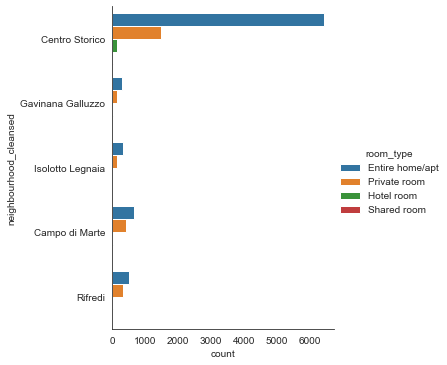

In [61]:
sns.catplot(data=df_cols_clean, y="neighbourhood_cleansed", hue = 'room_type', kind='count')

In [76]:
df_cols_clean['neighbourhood_cleansed'].value_counts()

Centro Storico       8089
Campo di Marte       1092
Rifredi               885
Isolotto Legnaia      469
Gavinana Galluzzo     458
Name: neighbourhood_cleansed, dtype: int64

[Back to TOC](#Table-of-Contents) 
<a id='chapter3'></a>

## Data Pre-processing

### Duplicate instances check

In [66]:
df_cols_clean[df_cols_clean.duplicated() == True]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,bbq_grill,crib,gym,bed_linens,hair_dryer,luggage_dropoff_allowed,self_checkin,cooking_basics,refrigerator,price_per_person


### Encoding categorical data

In [78]:
df_clean_listings = pd.get_dummies(df_cols_clean)

In [79]:
df_clean_listings.columns

Index(['id', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms', 'bathroom_shared', 'days_since_first_review',
       'days_since_last_review', 'coffee_machine', 'wifi', 'fireplace',
       'microwave', 'parking', 'bathroom_essentials', 'pool',
       'terrace_patio_balcony', 'bathtub', 'sauna', 'bikes', 'iron',
       'garden_backyard', 'workspace', 'tv', 'air_conditioning',
       'pets_allowed', 'bbq_grill', 'crib', 'gym', 'bed_linens', 'hair_dryer',
       'luggage_d

In [80]:
#df_clean_listings.to_pickle('./data/df_clean_listings.pkl')

In [5]:
## Checking to make sure it pickled correctly:
df_clean_listings = pd.read_pickle('./data/df_clean_listings.pkl')
df_clean_listings.shape

(10993, 79)